In [ ]:
import pandas as pd


url = "https://www.basketball-reference.com/leagues/NBA_2024_totals.html"


tables = pd.read_html(url)


df = tables[0]


df = df[df['Rk'] != 'Rk']
df.reset_index(drop=True, inplace=True)


print(df.columns.tolist())


non_numeric_cols = ['Player', 'Pos']
numeric_cols = [col for col in df.columns if col not in non_numeric_cols]


for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


df.fillna(df.mean(numeric_only=True), inplace=True)


df.drop_duplicates(inplace=True)

print(df.head())



['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Trp-Dbl', 'Awards']
    Rk                   Player   Age  Team Pos     G    GS      MP     FG  \
0  1.0              Luka Dončić  24.0   NaN  PG  70.0  70.0  2624.0  804.0   
1  2.0  Shai Gilgeous-Alexander  25.0   NaN  PG  75.0  75.0  2553.0  796.0   
2  3.0    Giannis Antetokounmpo  29.0   NaN  PF  73.0  73.0  2567.0  837.0   
3  4.0            Jalen Brunson  27.0   NaN  PG  77.0  77.0  2726.0  790.0   
4  5.0             Nikola Jokić  28.0   NaN   C  79.0  79.0  2737.0  822.0   

      FGA  ...    DRB    TRB    AST    STL   BLK    TOV     PF     PTS  \
0  1652.0  ...  588.0  647.0  686.0   99.0  38.0  282.0  149.0  2370.0   
1  1487.0  ...  350.0  415.0  465.0  150.0  67.0  162.0  184.0  2254.0   
2  1369.0  ...  645.0  841.0  476.0   87.0  79.0  250.0  210.0  2222.0   
3  1648.

In [ ]:

if 'Rk' in df.columns:
    df = df[df['Rk'] != 'Rk']

df.reset_index(drop=True, inplace=True)

non_numeric_cols = [col for col in ['Player', 'Pos', 'Tm'] if col in df.columns]
numeric_cols = [col for col in df.columns if col not in non_numeric_cols]

for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.fillna(df.mean(numeric_only=True), inplace=True)
df.drop_duplicates(inplace=True)

print(df.head())




    Rk                   Player   Age  Team Pos     G    GS      MP     FG  \
0  1.0              Luka Dončić  24.0   NaN  PG  70.0  70.0  2624.0  804.0   
1  2.0  Shai Gilgeous-Alexander  25.0   NaN  PG  75.0  75.0  2553.0  796.0   
2  3.0    Giannis Antetokounmpo  29.0   NaN  PF  73.0  73.0  2567.0  837.0   
3  4.0            Jalen Brunson  27.0   NaN  PG  77.0  77.0  2726.0  790.0   
4  5.0             Nikola Jokić  28.0   NaN   C  79.0  79.0  2737.0  822.0   

      FGA  ...    DRB    TRB    AST    STL   BLK    TOV     PF     PTS  \
0  1652.0  ...  588.0  647.0  686.0   99.0  38.0  282.0  149.0  2370.0   
1  1487.0  ...  350.0  415.0  465.0  150.0  67.0  162.0  184.0  2254.0   
2  1369.0  ...  645.0  841.0  476.0   87.0  79.0  250.0  210.0  2222.0   
3  1648.0  ...  235.0  278.0  519.0   70.0  13.0  186.0  144.0  2212.0   
4  1411.0  ...  753.0  976.0  708.0  108.0  68.0  237.0  194.0  2085.0   

   Trp-Dbl  Awards  
0     21.0     NaN  
1      0.0     NaN  
2     10.0     NaN  
3 

In [ ]:
averages = df[numeric_cols].mean()
print(averages)

desc_stats = df[numeric_cols].describe()
print(desc_stats)


Rk         289.334694
Age         26.155102
Team              NaN
G           40.880272
GS          18.440816
MP         907.757823
FG         156.152381
FGA        330.696599
FG%          0.447595
3P          48.013605
3PA        131.824490
3P%          0.316996
2P         108.138776
2PA        198.872109
2P%          0.519721
eFG%         0.515735
FT          62.585034
FTA         79.917007
FT%          0.749721
ORB         39.398639
DRB        122.627211
TRB        162.025850
AST         99.865306
STL         28.167347
BLK         19.087075
TOV         48.019048
PF          70.583673
PTS        422.903401
Trp-Dbl      0.187755
Awards            NaN
dtype: float64
               Rk         Age  Team           G          GS           MP  \
count  736.000000  736.000000   0.0  736.000000  736.000000   736.000000   
mean   289.334694   26.155102   NaN   40.880272   18.440816   907.757823   
std    157.212606    4.368770   NaN   25.563885   25.007079   808.947812   
min      1.000000   1

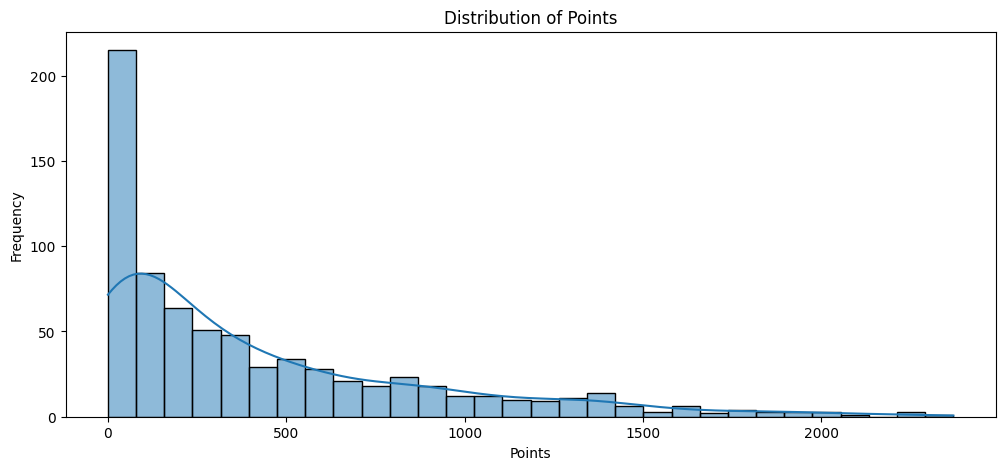

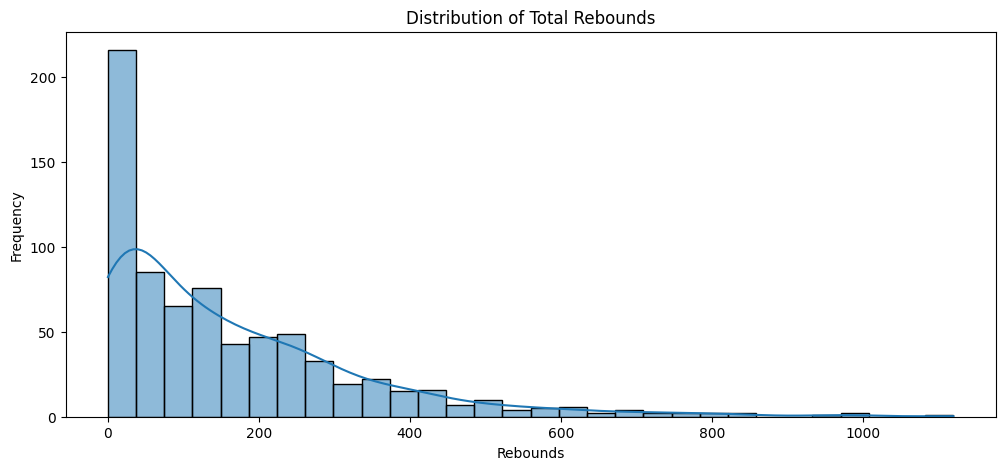

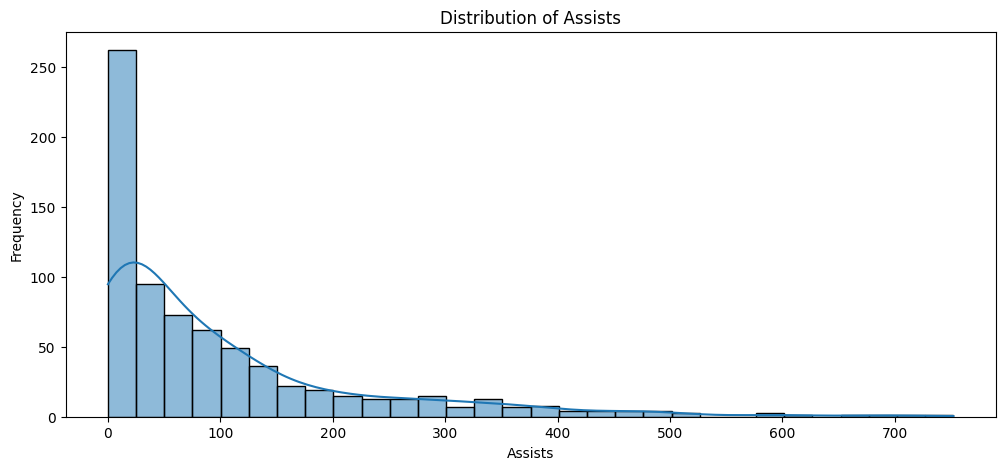

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.histplot(df['PTS'], bins=30, kde=True)
plt.title("Distribution of Points")
plt.xlabel("Points")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(df['TRB'], bins=30, kde=True)
plt.title("Distribution of Total Rebounds")
plt.xlabel("Rebounds")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(df['AST'], bins=30, kde=True)
plt.title("Distribution of Assists")
plt.xlabel("Assists")
plt.ylabel("Frequency")
plt.show()


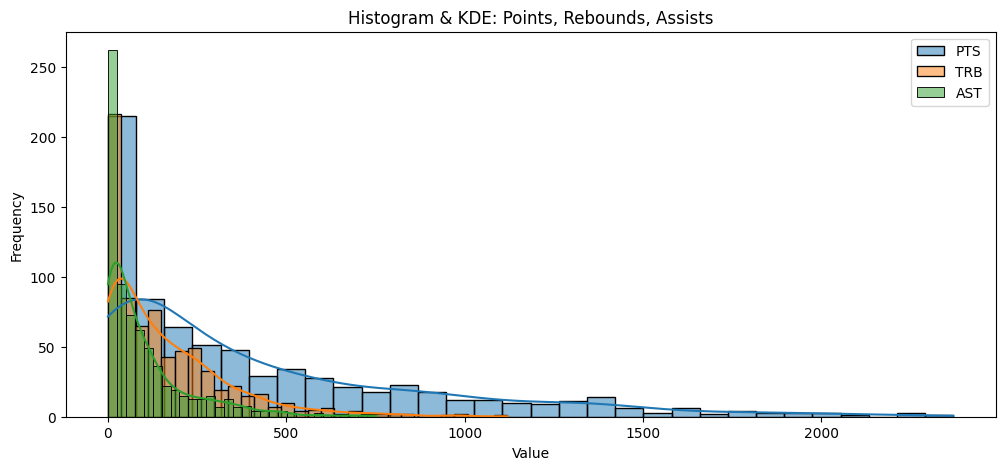

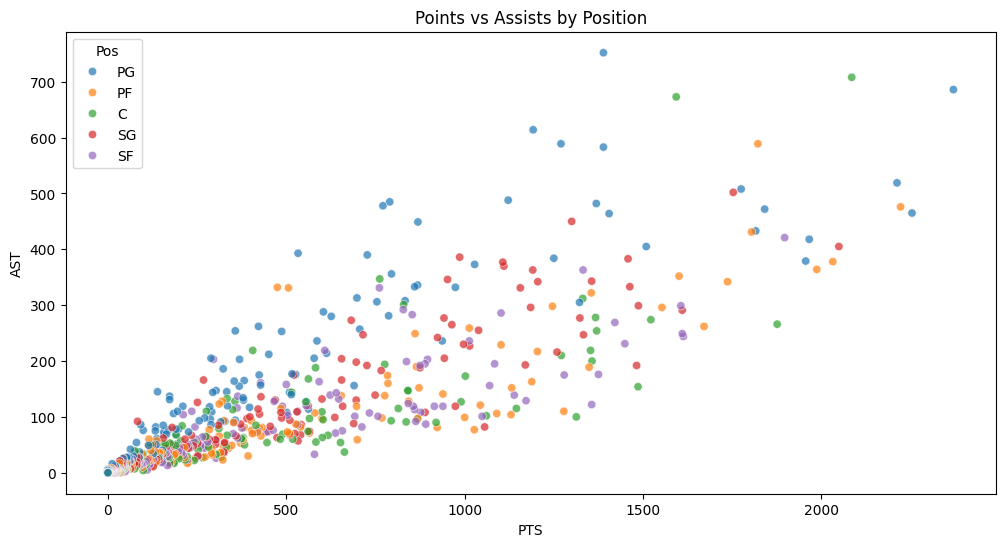

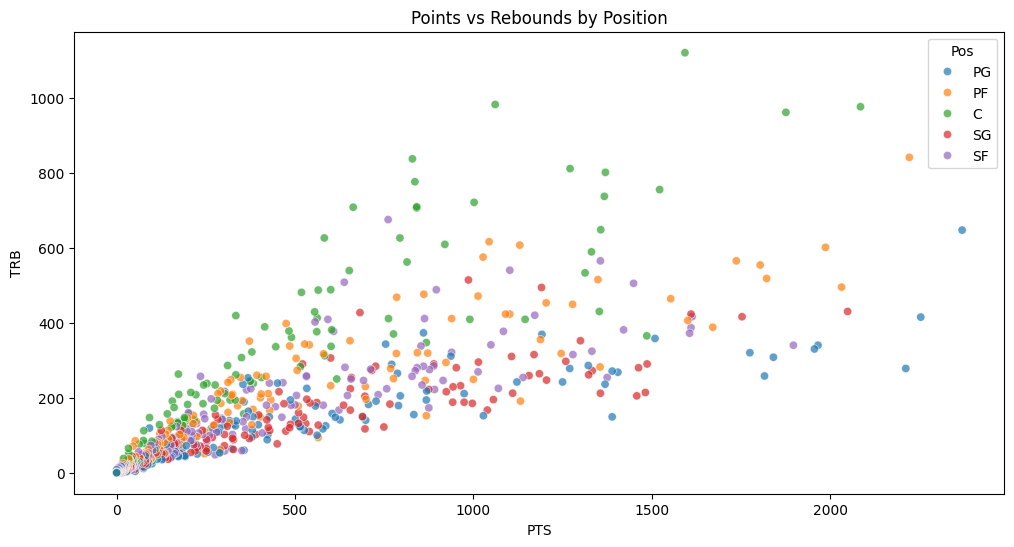

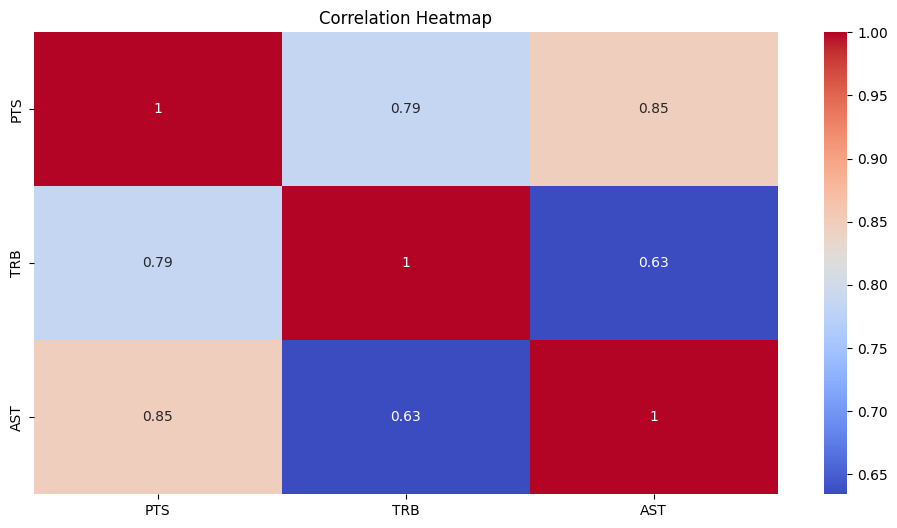

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12,5))
for col in ['PTS', 'TRB', 'AST']:
    sns.histplot(df[col], bins=30, kde=True, label=col, alpha=0.5)
plt.title("Histogram & KDE: Points, Rebounds, Assists")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='PTS', y='AST', hue='Pos', palette='tab10', alpha=0.7)
plt.title("Points vs Assists by Position")
plt.show()


plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='PTS', y='TRB', hue='Pos', palette='tab10', alpha=0.7)
plt.title("Points vs Rebounds by Position")
plt.show()


plt.figure(figsize=(12,6))
sns.heatmap(df[['PTS','TRB','AST']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


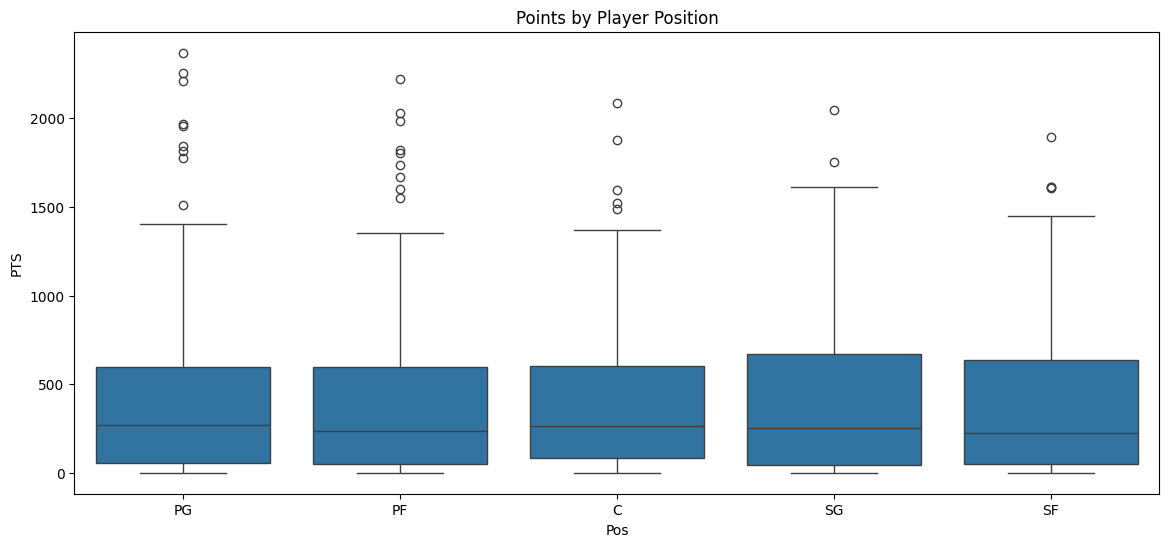

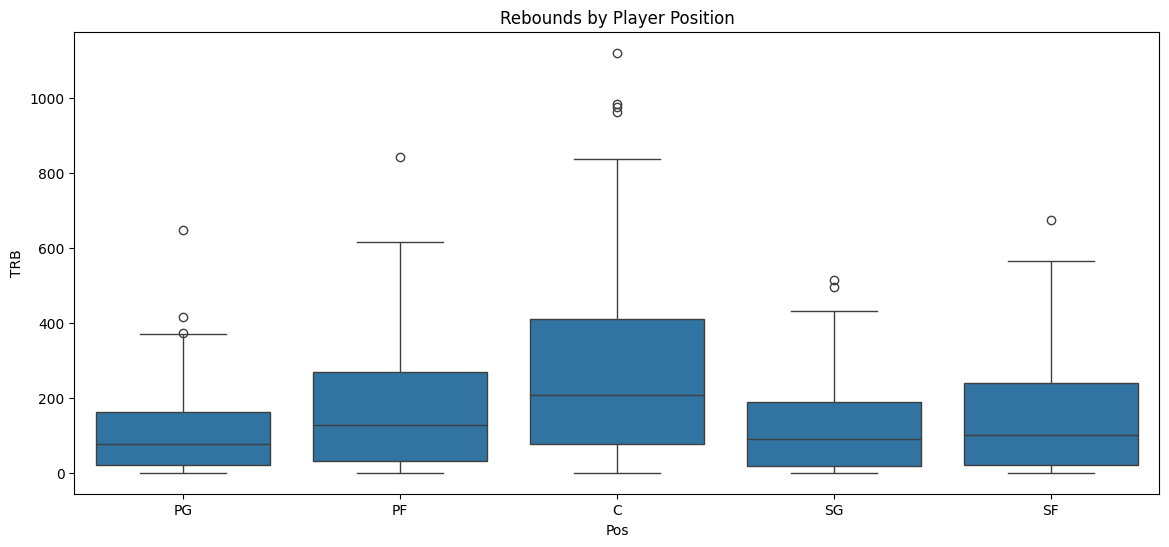

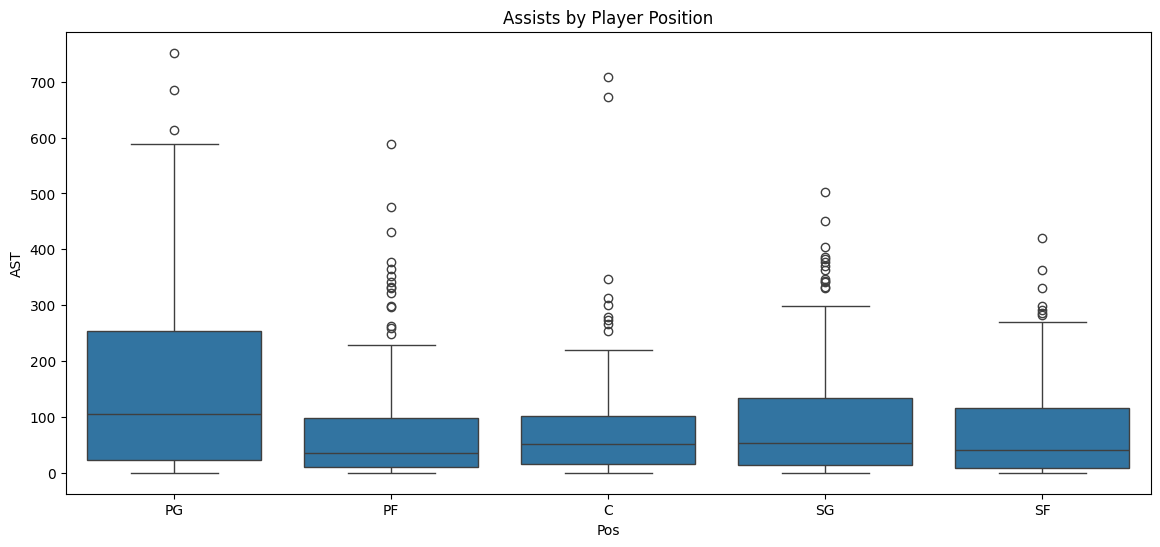

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Pos', y='PTS', data=df)
plt.title("Points by Player Position")
plt.show()

plt.figure(figsize=(14,6))
sns.boxplot(x='Pos', y='TRB', data=df)
plt.title("Rebounds by Player Position")
plt.show()

plt.figure(figsize=(14,6))
sns.boxplot(x='Pos', y='AST', data=df)
plt.title("Assists by Player Position")
plt.show()


In [ ]:
df.to_csv("NBA_2024_totals_cleaned.csv", index=False)
